In [77]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from src.utils import get_absolute_zip_path

In [78]:
vacant_lot = pd.read_csv('../data/6-1-2020-Vacant-Lot-List.csv')
vacant_lot

,ParcelID,Address,Ward,Neigh,AssN,Usage,Description,Front,Side I,LotSF,Add#,Street
0,44530000400,4864 Palm St,1,55,301,Vacant Lot,NaN,20.00,107.5,2457.000000,4864,Palm
1,44530001900,4814 Palm St,1,55,301,Vacant Lot,NaN,30.00,107.5,3477.000000,4814,Palm
2,44530002250,4800 Palm St,1,55,301,Vacant Lot,NaN,50.00,107.6,5312.999783,4800,Palm
3,44540003300,4857R Palm St,1,55,301,Vacant Lot,NaN,18.00,120.0,3908.921171,4857,Palm
4,44550002250,4947-9 Palm St,1,55,301,Vacant Lot,NaN,50.00,130.0,6021.000000,4947,Palm
...,...,...,...,...,...,...,...,...,...,...,...,...
6683,46030502700,1114R Blendon Pl,28,44,201,Vacant Lot,NaN,5.00,25.0,124.787497,1114,Blendon
6684,38741802150,5534 Waterman Blvd,28,47,229,Vacant Lot,NaN,19.00,152.0,3952.000000,5534,Waterman
6685,45800601900,4419 McPherson Av,28,38,230,Vacant Lot,NaN,25.00,140.0,35.000000,4419,McPherson
6686,45800602100,4423 McPherson Av,28,38,230,Vacant Lot,NaN,0.25,140.0,35.000000,4423,McPherson


In [79]:
parcel = pd.read_csv('../data/par.csv', encoding = "ISO-8859-1", low_memory=False)
parcel

,"HANDLE,C,14","UPDATED,D","SITEADDR,C,40","OWNERNAME,C,36","OWNERNAME2,C,40","OWNERADDR,C,40","OWNERCITY,C,13","OWNERSTATE,C,2","OWNERCNTRY,C,13","OWNERZIP,C,9",...,"OWNEROCC,C,1","VACBLDGYR,N,4,0","PARCEL10,N,10,0","CENTRACT10,N,7,2","CENBLOCK10,N,4,0","WARD10,N,2,0","PRECINCT10,N,2,0","INSPAREA10,N,2,0","LEAFAREA,N,2,0","BLOCKPART,N,9,4"
0,10001000005,06/17/2020,626 S 1ST ST,CITY OF ST LOUIS,NaN,1200 MARKET ST,ST LOUIS MO,NaN,NaN,63103,...,NaN,0,1000005,1274.00,1054,7,6,3,0,1.0085
1,10001000010,06/17/2020,616-22 S 1ST ST,STATE OF MISSOURI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1993,1000010,1274.00,1045,7,6,3,0,1.0085
2,10001000020,06/17/2020,608 S 1ST ST,TERMINAL RAILROAD ASSN,NaN,ROOM 211 UNION STATION,ST LOUIS,MO,NaN,63103,...,NaN,0,1000020,1256.00,2102,7,6,3,0,1.0085
3,10001000032,06/17/2020,619 S LEONOR K SULLIVAN BLVD,"SLAY, JOHN R",NaN,2812 CHAMPIONSHIP BLVD,ST LOUIS,MO,NaN,63129,...,NaN,0,1000032,1274.00,1054,7,6,3,0,1.0085
4,10001000034,06/17/2020,620 S COMMERCIAL ST,TERMINAL RAILROAD ASSOCIATION P M.J.,NaN,1017 OLIVE ST 5TH FLOOR,ST LOUIS,MO,USA,63101,...,NaN,0,1000034,1274.00,1054,7,6,3,0,1.0085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127652,19999000904,06/17/2020,9040 NO PRIMARY ADDRESS,ENABLE MISSISSIPPI RIVER TRAMSMISSON,C/O PUFF & PHELPS LLC ROSIE JASSO,PO BOX 2629,ADDISON,TX,NaN,75001,...,NaN,0,9999000904,9999.99,9999,99,99,99,0,9999.9000
127653,19999000905,06/17/2020,9050 NO PRIMARY ADDRESS,SOUTHWESTERN BELL TELEPHONE CO,ATTN CATHY M FULLER,1010 PINE 9E-L-01,ST LOUIS,MO,NaN,63101,...,NaN,0,9999000905,9999.99,9999,99,99,99,0,9999.9000
127654,19999000906,06/17/2020,9060 NO PRIMARY ADDRESS,CENTURY LINK COMMUNICATIONS,ATTN AMY BRILEY,PO BOX 2599,OLATHE,KS,NaN,66063,...,NaN,0,9999000906,9999.99,9999,99,99,99,0,9999.9000
127655,19999000907,06/17/2020,9070 NO PRIMARY ADDRESS,CENTURY LINK COMMUNICATIONS,ATTN AMY BRILEY,PO BOX 2599,OLATHE,KS,NaN,66063,...,NaN,0,9999000907,9999.99,9999,99,99,99,0,9999.9000


In [80]:
parcel.rename(lambda s: s.split(',')[0], axis='columns', inplace=True)
parcel

,HANDLE,UPDATED,SITEADDR,OWNERNAME,OWNERNAME2,OWNERADDR,OWNERCITY,OWNERSTATE,OWNERCNTRY,OWNERZIP,...,OWNEROCC,VACBLDGYR,PARCEL10,CENTRACT10,CENBLOCK10,WARD10,PRECINCT10,INSPAREA10,LEAFAREA,BLOCKPART
0,10001000005,06/17/2020,626 S 1ST ST,CITY OF ST LOUIS,NaN,1200 MARKET ST,ST LOUIS MO,NaN,NaN,63103,...,NaN,0,1000005,1274.00,1054,7,6,3,0,1.0085
1,10001000010,06/17/2020,616-22 S 1ST ST,STATE OF MISSOURI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1993,1000010,1274.00,1045,7,6,3,0,1.0085
2,10001000020,06/17/2020,608 S 1ST ST,TERMINAL RAILROAD ASSN,NaN,ROOM 211 UNION STATION,ST LOUIS,MO,NaN,63103,...,NaN,0,1000020,1256.00,2102,7,6,3,0,1.0085
3,10001000032,06/17/2020,619 S LEONOR K SULLIVAN BLVD,"SLAY, JOHN R",NaN,2812 CHAMPIONSHIP BLVD,ST LOUIS,MO,NaN,63129,...,NaN,0,1000032,1274.00,1054,7,6,3,0,1.0085
4,10001000034,06/17/2020,620 S COMMERCIAL ST,TERMINAL RAILROAD ASSOCIATION P M.J.,NaN,1017 OLIVE ST 5TH FLOOR,ST LOUIS,MO,USA,63101,...,NaN,0,1000034,1274.00,1054,7,6,3,0,1.0085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127652,19999000904,06/17/2020,9040 NO PRIMARY ADDRESS,ENABLE MISSISSIPPI RIVER TRAMSMISSON,C/O PUFF & PHELPS LLC ROSIE JASSO,PO BOX 2629,ADDISON,TX,NaN,75001,...,NaN,0,9999000904,9999.99,9999,99,99,99,0,9999.9000
127653,19999000905,06/17/2020,9050 NO PRIMARY ADDRESS,SOUTHWESTERN BELL TELEPHONE CO,ATTN CATHY M FULLER,1010 PINE 9E-L-01,ST LOUIS,MO,NaN,63101,...,NaN,0,9999000905,9999.99,9999,99,99,99,0,9999.9000
127654,19999000906,06/17/2020,9060 NO PRIMARY ADDRESS,CENTURY LINK COMMUNICATIONS,ATTN AMY BRILEY,PO BOX 2599,OLATHE,KS,NaN,66063,...,NaN,0,9999000906,9999.99,9999,99,99,99,0,9999.9000
127655,19999000907,06/17/2020,9070 NO PRIMARY ADDRESS,CENTURY LINK COMMUNICATIONS,ATTN AMY BRILEY,PO BOX 2599,OLATHE,KS,NaN,66063,...,NaN,0,9999000907,9999.99,9999,99,99,99,0,9999.9000


In [103]:
shape_path = '../data/prcl_shape.zip'
shape = gpd.read_file(get_absolute_zip_path(shape_path))
shape = shape.to_crs({"init": "EPSG:4326"})
shape = shape.astype({'HANDLE': 'int64'})
shape

,HANDLE,geometry
0,10001000005,"POLYGON ((-90.18691 38.61874, -90.18693 38.618..."
1,10001000010,"MULTIPOLYGON (((-90.18685 38.61888, -90.18685 ..."
2,10001000020,"POLYGON ((-90.18671 38.61941, -90.18675 38.619..."
3,10001000032,"POLYGON ((-90.18645 38.61858, -90.18648 38.618..."
4,10001000034,"POLYGON ((-90.18653 38.61861, -90.18653 38.618..."
...,...,...
127616,19121000175,"POLYGON ((-90.18191 38.77332, -90.18196 38.773..."
127617,19121000185,"POLYGON ((-90.17584 38.77274, -90.17619 38.772..."
127618,19121000250,"POLYGON ((-90.18036 38.76328, -90.18053 38.762..."
127619,19121000260,"POLYGON ((-90.18098 38.76490, -90.18221 38.765..."


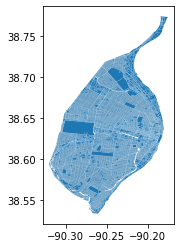

In [104]:
shape.plot()

In [105]:
vacant_lot['Address'] = vacant_lot['Address'].map(lambda x: x.upper())
vacant_lot['Address']

0             4864 PALM ST
1             4814 PALM ST
2             4800 PALM ST
3            4857R PALM ST
4           4947-9 PALM ST
               ...        
6683      1114R BLENDON PL
6684    5534 WATERMAN BLVD
6685     4419 MCPHERSON AV
6686     4423 MCPHERSON AV
6687     4427 MCPHERSON AV
Name: Address, Length: 6688, dtype: object

In [106]:
vacant_parcel = parcel[parcel['SITEADDR'].isin(vacant_lot['Address'])]
vacant_parcel

,HANDLE,UPDATED,SITEADDR,OWNERNAME,OWNERNAME2,OWNERADDR,OWNERCITY,OWNERSTATE,OWNERCNTRY,OWNERZIP,...,OWNEROCC,VACBLDGYR,PARCEL10,CENTRACT10,CENBLOCK10,WARD10,PRECINCT10,INSPAREA10,LEAFAREA,BLOCKPART
156,10052000050,06/17/2020,210 PLUM ST,LRA,NaN,1520 MARKET ST STE 2000,ST LOUIS,MO,NaN,63103,...,NaN,0,52000050,1274.0,1036,7,6,3,0,52.0081
917,10308030040,06/17/2020,121 DOCK ST,LRA,NaN,1520 MARKET ST SUITE 2000,ST LOUIS,MO,NaN,63103,...,NaN,1992,308030040,1267.0,2043,2,1,1,0,308.0300
1068,10339000010,06/17/2020,914 MONTGOMERY ST,L R A,NaN,1520 MARKET ST SUITE 2000,ST LOUIS,MO,NaN,63103,...,NaN,0,339000010,1266.0,2020,5,4,1,0,339.0000
1069,10339000020,06/17/2020,908-10 MONTGOMERY ST,LRA,NaN,1520 MARKET ST SUITE 2000,ST LOUIS,MO,NaN,63103,...,NaN,0,339000020,1266.0,2020,5,4,1,0,339.0000
1074,10339000070,06/17/2020,2607 1/2 N 9TH ST,LRA,NaN,1520 MARKET ST SUITE 2000,ST LOUIS,MO,NaN,63103,...,NaN,0,339000070,1266.0,2020,5,4,1,0,339.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127137,16506000150,06/17/2020,5863 GREER AV,L R A,NaN,1520 MARKET ST SUITE 2000,ST LOUIS,MO,NaN,63103,...,NaN,0,6506000150,1062.0,1007,22,3,2,0,6506.0000
127138,16506000160,06/17/2020,5869 GREER AV,LRA,NaN,1520 MARKET ST SUITE 2000,ST LOUIS,MO,NaN,63103,...,NaN,0,6506000160,1062.0,1007,22,3,2,0,6506.0000
127141,16506000190,06/17/2020,5879 GREER AV,LRA,NaN,1520 MARKET ST STE 2000,ST LOUIS,MO,NaN,63103,...,NaN,0,6506000190,1062.0,1007,22,3,2,0,6506.0000
127224,19036000070,06/17/2020,3963 NEOSHO ST,LRA,NaN,1520 MARKET ST SUITE 2000,ST LOUIS,MO,NaN,63103,...,NaN,0,9036000070,1153.0,1003,14,6,2,0,9036.0087


In [107]:
vacant_shape = shape[shape['HANDLE'].isin(vacant_parcel['HANDLE'])]
vacant_shape

,HANDLE,geometry
156,10052000050,"POLYGON ((-90.18907 38.61914, -90.18917 38.619..."
917,10308030040,"POLYGON ((-90.19070 38.65788, -90.19122 38.657..."
1068,10339000010,"POLYGON ((-90.19224 38.65173, -90.19272 38.651..."
1069,10339000020,"POLYGON ((-90.19210 38.65178, -90.19220 38.651..."
1074,10339000070,"POLYGON ((-90.19162 38.65164, -90.19183 38.651..."
...,...,...
127137,16506000150,"POLYGON ((-90.27488 38.68307, -90.27497 38.683..."
127138,16506000160,"POLYGON ((-90.27497 38.68311, -90.27507 38.683..."
127141,16506000190,"POLYGON ((-90.27534 38.68328, -90.27544 38.683..."
127224,19036000070,"POLYGON ((-90.25680 38.58028, -90.25719 38.580..."


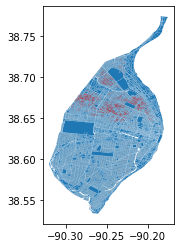

In [108]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
shape.plot(ax=ax)
vacant_shape.plot(ax=ax, color='red')
plt.show()
